===========Runge Kutta System Method============


,Tempo,y_exato,y_numérico,v_exato,v_numérico
0,0.1,0.500000,0.336094,-0.000000,-2.976875
1,0.2,0.334960,-0.010396,-2.989867,-3.529408
2,0.3,-0.013985,-0.287164,-3.529181,-1.750175
3,0.4,-0.290750,-0.331963,-1.717882,0.811129
4,0.5,-0.331745,-0.158751,0.861695,2.392875
...,...,...,...,...,...
95,9.6,0.000038,0.000030,-0.000013,-0.000130
96,9.7,0.000024,0.000010,-0.000231,-0.000245
97,9.8,-0.000002,-0.000013,-0.000262,-0.000185
98,9.9,-0.000022,-0.000023,-0.000120,-0.000018


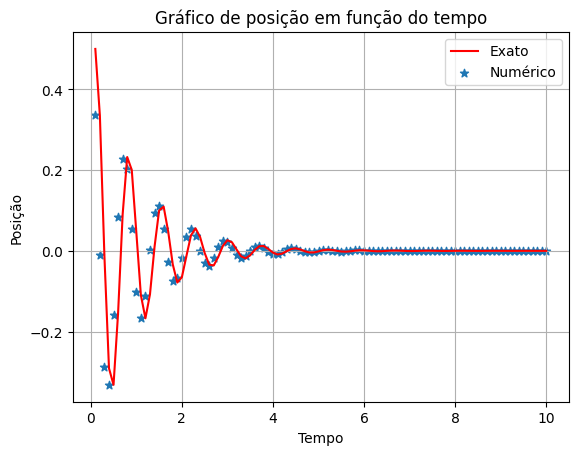

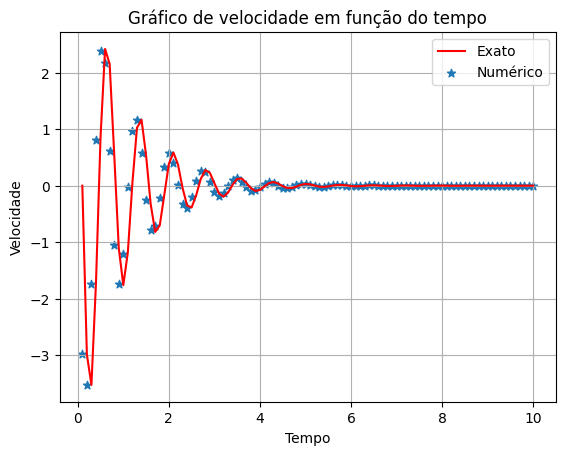

In [20]:
"""
  Trabalho 1 - Métodos Númericos para Equações Diferenciais
  Aluno: Victor Luis Teixeira Reis - 202110049511

  Problema: 
    dy/dt = dy_1/dt = f_1(t, y, v) = v
    dv/dt = dy_2/dt =  f_2(t, y, v) = -(A*v + B*y)
    Método: yi+1 = yi + (1/8)*(k1 + 3*k2 + 3*k3 + k4) * Δt
"""

from math import *
import pandas as pd
import matplotlib.pyplot as plt

def f_1(t, y, v):
  return v

def f_2(t, y, v):
  return -(A*v + B*y)

def analytic_position(y_0, t):
  return y_0*exp(P*t)*(cos(Q*t) - (P/Q)*sin(Q*t))

def analytic_velocity(y_0, t):
  return -y_0*exp(P*t)*((P**2 + Q**2)/Q)*sin(Q*t)

def calculate_k_matrix(k, actual_value, delta_t):
  [t_i, y_i, v_i] =  actual_value
  third_delta_t = (1/3) * delta_t
  two_third_delta_t = (2/3) * delta_t

  k[0][0] = f_1(t_i, y_i, v_i)
  k[1][0] = f_2(t_i, y_i, v_i)
  k[0][1] = f_1(t_i + third_delta_t, y_i + k[0][0]*third_delta_t, v_i + k[1][0]*third_delta_t)
  k[1][1] = f_2(t_i + third_delta_t, y_i + k[0][0]*third_delta_t, v_i + k[1][0]*third_delta_t)
  k[0][2] = f_1(t_i + two_third_delta_t, y_i - k[0][0]*third_delta_t + k[0][1]*delta_t, v_i - k[1][0]*third_delta_t + k[1][1]*delta_t)
  k[1][2] = f_2(t_i + two_third_delta_t, y_i - k[0][0]*third_delta_t + k[0][1]*delta_t, v_i - k[1][0]*third_delta_t + k[1][1]*delta_t)
  k[0][3] = f_1(t_i + delta_t, y_i + k[0][0]*delta_t - k[0][1]*delta_t + k[0][2]*delta_t, v_i + k[1][0]*delta_t - k[1][1]*delta_t + k[1][2]*delta_t)
  k[1][3] = f_2(t_i + delta_t, y_i + k[0][0]*delta_t - k[0][1]*delta_t + k[0][2]*delta_t, v_i + k[1][0]*delta_t - k[1][1]*delta_t + k[1][2]*delta_t)


def runge_kutta(initial_value, delta_t, x):
  counter = 0
  actual_value = initial_value
  y_0 = initial_value[1]

  k = [
    [0.0, 0.0, 0.0, 0.0], # [k_11, k_12, k_13, k_14]
    [0.0, 0.0, 0.0, 0.0], # [k_21, k_22, k_23, k_24]
  ]

  while actual_value[0] < x:
    calculate_k_matrix(k, actual_value, delta_t)

    actual_value[1] = actual_value[1] + ((1/8)*(k[0][0] + 3*k[0][1] + 3*k[0][2] + k[0][3]) * delta_t)
    actual_value[2] = actual_value[2] + ((1/8)*(k[1][0] + 3*k[1][1] + 3*k[1][2] + k[1][3]) * delta_t)

    exact_position = analytic_position(y_0, actual_value[0])
    exact_velocity = analytic_velocity(y_0, actual_value[0])

    actual_value[0] = round(actual_value[0] + delta_t, 1)
    
    counter += 1

    add_table_data(actual_value[0], actual_value[1], exact_position, actual_value[2], exact_velocity)

  return [actual_value[1], actual_value[2]]

def add_table_data (time, yn, ye, vn, ve):
  table_data['Tempo'].append(time)
  table_data['y_exato'].append(ye)
  table_data['y_numérico'].append(yn)
  table_data['v_exato'].append(ve)
  table_data['v_numérico'].append(vn)

def plot_position_graph (t, y_exact, y_numeric):
  plt.plot(t, y_exact, label="Exato", color="red")
  plt.scatter(t, y_numeric, label="Numérico", marker='*')
  plt.xlabel('Tempo')
  plt.ylabel('Posição')
  plt.title('Gráfico de posição em função do tempo')
  plt.grid(True) 
  plt.legend()
  plt.show()

  
def plot_velocity_graph (t, v_exact, v_numeric):
  plt.plot(t, v_exact, label="Exato", color="red")
  plt.scatter(t, v_numeric, label="Numérico", marker='*')
  plt.xlabel('Tempo')
  plt.ylabel('Velocidade')
  plt.title('Gráfico de velocidade em função do tempo')
  plt.grid(True) 
  plt.legend()
  plt.show()


initial_value = [0.0, 0.5, 0.0] # [t_0, y_0, v_0]
delta_t = 0.1
t = 10.0
c = 4
m = 2.0
k = 150.0

A = c/m
B = k/m

P = - (A/2)
Q = sqrt(B - ((A**2)/4))

table_data = {
  'Tempo': [],
  'y_exato': [],
  'y_numérico': [],
  'v_exato': [],
  'v_numérico': [],
}

print(f'===========Runge Kutta System Method============')

y, v = runge_kutta(initial_value, delta_t, t)

df = pd.DataFrame(table_data)
display(df)

plot_position_graph(table_data["Tempo"], table_data["y_exato"], table_data["y_numérico"])
plot_velocity_graph(table_data["Tempo"], table_data["v_exato"], table_data["v_numérico"])